In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters import threshold_local
from PIL import Image

In [31]:
#define resize function
def opencv_resize(image, ratio):
    width = int(image.shape[1] * ratio)
    height = int(image.shape[0] * ratio)
    dim = (width, height)
    return cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

#define plot gray image with the size 16x10 function
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

#define plot color image with the size 16x10 function
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

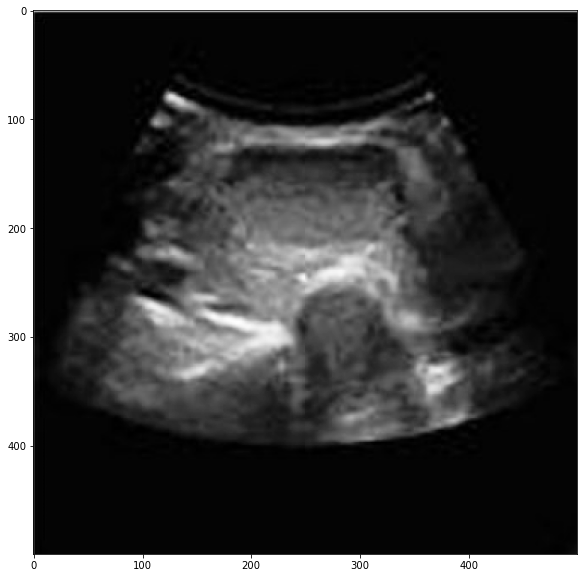

In [33]:
#get the image
file_name = 'C:/Users/Laptop88/Desktop/Thyroid Cancer untrasound images/The-single-layer-of-thyroid-ultrasound-image-after-cutting_Q320.jpg'
image = cv2.imread(file_name)
#downscale image to more efficient to find contour
resize_ratio = 500 / image.shape[0]
original=image.copy()
image = opencv_resize(image, resize_ratio)
#convert image to gray scale to easy utilise
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_gray(gray_image)

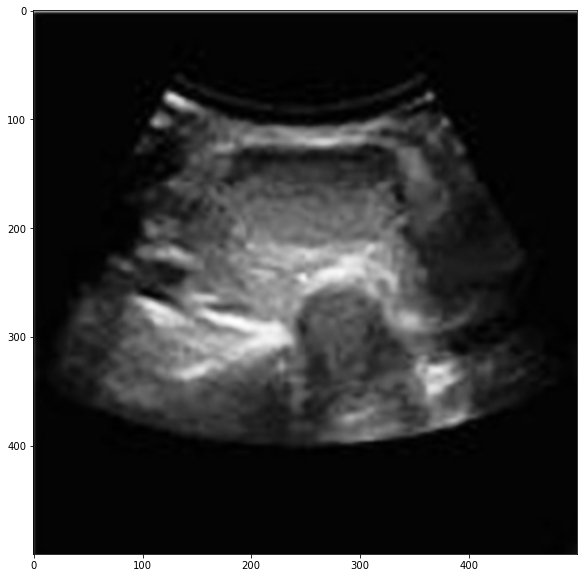

In [34]:
#get rid of the noise with Gaussian Blur filter size 5x5, sigma = 0
blurred = cv2.GaussianBlur(gray_image, (5,5), 0)
plot_gray(blurred)

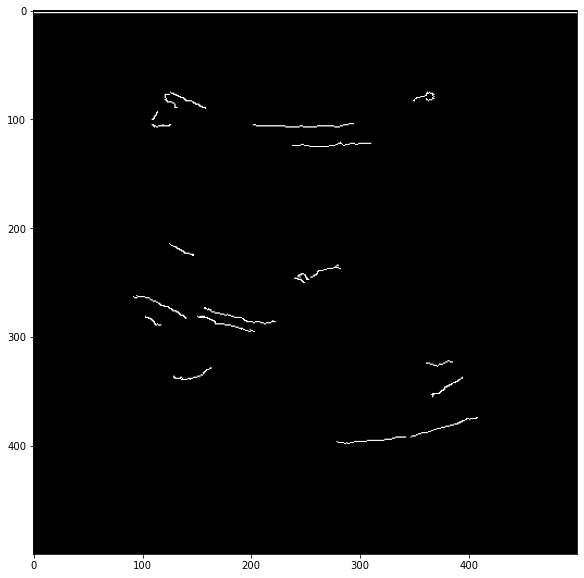

In [35]:
#using canny detect edge
edge = cv2.Canny(blurred, 100,200)
plot_gray(edge)

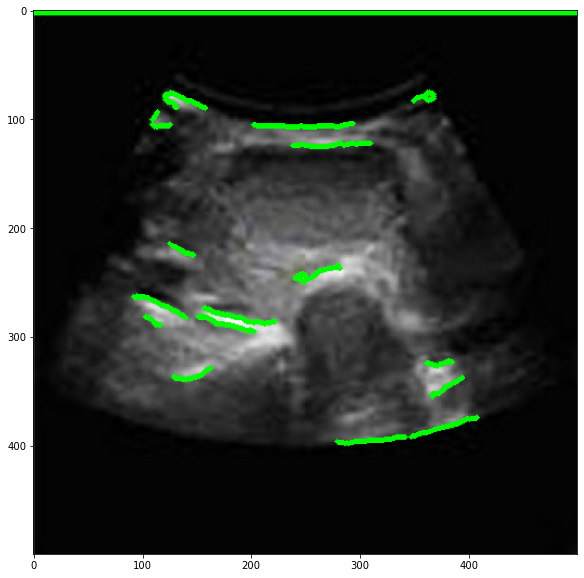

In [36]:
#highlight contour 
contours, hierarchy = cv2.findContours(edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0,255,0), 3)
plot_rgb(image_with_contours)

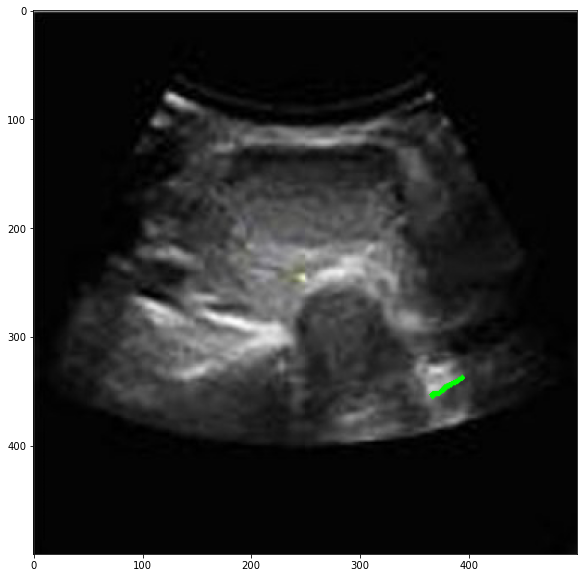

In [38]:
#get largest contour
largest_contours = sorted(contours, key = cv2.contourArea, reverse = True)[:1]
image_with_largest_contours = cv2.drawContours(image.copy(), largest_contours, -1, (0,255,0), 3)
plot_rgb(image_with_largest_contours)